# Векторный потенциал прецессирующего магнитного диполя

нам потребуются интегралы по координатному углу $\varphi$ точек истока от нуля до $2\pi$ и $\int\limits_{0}^{2\pi}{\frac{cos\left(\varphi\right)}{R}}d{\varphi} = 0$

$\int\limits_{0}^{2\pi}{\frac{sin\left(\varphi\right)}{R}}d{\varphi} = 0$

$R=\sqrt{(r_j\,sin(\varphi_j)-r_a\,sin(\varphi_a))^2+(r_j\,cos(\varphi_j)-r_a\,cos(\varphi_a))^2+(z_j-z_a)^2}$

Ввиду цилиндрической симметрии и ввиду того что

$\frac{\partial A}{\partial \varphi_a} = 0$

нам не потребуется дифференцирование векторного потенциала по $\varphi_a$ координате точек наблюдения, можно упростить расчёт полагая, что $\varphi_a = 0$, тогда 

$R=\sqrt{r_j^2+r_a^2-2\,r_j\,r_a\,cos(\varphi_j)+(z_j-z_a)^2}$

In [1]:
phi_j = var("phi_j")
Rja2       = lambda rj, ra, zj, za, phi_j : rj^2 + ra^2 - 2*rj*ra*cos(phi_j) + (zj-za)^2
one_per_R  = lambda rj, ra, zj, za, phi_j : 1 / sqrt(Rja2(rj, ra, zj, za, phi_j))
a_phi      = lambda rj, ra, zj, za, phi_j : cos(phi_j) * one_per_R(rj, ra, zj, za, phi_j)

In [2]:
a_phi_dipol = lambda rj, ra, zj, za, phi_j : a_phi(rj, ra, zj, za, phi_j) - a_phi(rj, ra, -zj, za, phi_j)


In [140]:
z_j = var("z_j")
z_a = var("z_a")
r_j = var("r_j")
r_a = var("r_a")
phi = var("phi")

assume(r_j>0)
assume(r_a>r_j)

In [141]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

In [142]:
disp(Rja2(r_j, r_a, z_j, z_a, phi_j))

<IPython.core.display.Math object>

In [143]:
disp(a_phi(r_j, r_a, z_j, z_a, phi_j))

<IPython.core.display.Math object>

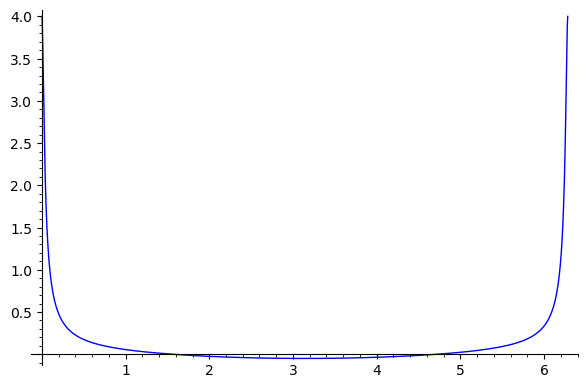

In [150]:
plot(a_phi(rj = 10, ra = 10.25, zj = 0, za = 0, phi_j = phi_j), phi_j, 0, 2*pi)

In [146]:
def get_integrand_view(f):
    return f(x)

class my_dummy_integral:
    f = None
    a = None
    b = None
    def __init__(self, f, a, b):
        print ("my_dummy_integral ", f, a, b)
        self.f = f
        self.a = a
        self.b = b

def num_int(f, a, b):
    from scipy import integrate

    to_call_integration = True

    if type(f) is my_dummy_integral:
        to_call_integration = False

    import inspect
    stack = inspect.stack()
    for frame in stack:
        func_name = frame[3]
        # print ("func_name = ", func_name)
        if ('get_integrand_view' == func_name):
            to_call_integration = False
            break;

    if not to_call_integration:
        return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a = ", a)
        print ("b = ", b)

        raise ex

        integral = numerical_integral(f, a, b)

        print ("integral = ", integral)

        result = integral[0]
        print ("result = ", result)
        return result


In [16]:
x, y, z = var("x,y,z")

In [18]:
A_E = \
(y*z/(sqrt(x^2 + y^2 + z^2)*(x^2 + y^2)),
 -x*z/(sqrt(x^2 + y^2 + z^2)*(x^2 + y^2)),
 0)

In [127]:
for AEi in A_E:
    disp(AEi.subs(x == r_a*cos(phi), y == r_a*sin(phi)).full_simplify())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

TypeError: subs() takes at most 1 positional argument (2 given)

In [128]:
A_y = -x*z/(sqrt(x^2 + y^2 + z^2)*(x^2 + y^2))

In [44]:
A_y0 = A_y.subs(y == 0)
A_y0

-z/(sqrt(x^2 + z^2)*x)

In [10]:
num_int( lambda phi_j : a_phi(rj = 10, ra = 10.5, zj = 1, za = 1.1, phi_j = phi_j), 0, 2*pi)

0.6015764178209648

In [11]:
num_int( lambda phi_j : a_phi(rj = 10, ra = 10.5, zj = -1, za = 1.1, phi_j = phi_j), 0, 2*pi)

0.3248439223023958

In [12]:
num_int( lambda phi_j : a_phi_dipol(rj = 10, ra = 10.5, zj = 1, za = 1.1, phi_j = phi_j), 0, 2*pi)

0.27673249551856066

In [19]:
A_dipol = lambda rj, ra, zj, za : num_int( lambda phi_j : a_phi_dipol(rj = rj, ra = ra, zj = zj, za = za, phi_j = phi_j), 0, 2*pi)

In [21]:
A_dipol(rj = 1, ra = 1, zj = 1, za = 1.1)

4.576202476449963

In [97]:
plot_data_A_phi_dipol_r = []
for ir in range(100):
    ra = 0.1 * ir
    A_phi_dipol = A_dipol(rj = 0.0001, ra = ra, zj = 0.0001, za = 1)
    plot_data_A_phi_dipol_r += [(ra, A_phi_dipol)]

-3.00000000000000e-8
-4.00000000000000e-8


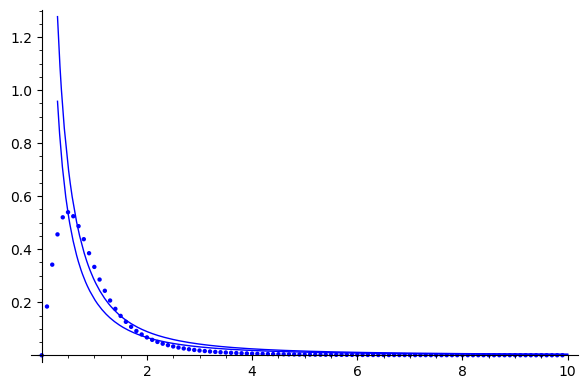

In [98]:
p = list_plot(plot_data_A_phi_dipol_r)
for ik in range(2):
    k = -0.00000001*(ik+3)
    print(k)
    p += plot(k*A_y0.subs(z == 1), x, 0.3, 10)
p.show()

In [132]:
plot_data_A_phi_dipol_z = []
for iz in range(100):
    za = 1 + 0.1 * iz
    A_phi_dipol = A_dipol(rj = 0.0001, ra = 1, zj = 0.0001, za = za)
    plot_data_A_phi_dipol_z += [(za, A_phi_dipol)]

In [133]:
A_y0.subs(x == 4)

-1/4*z/sqrt(z^2 + 16)

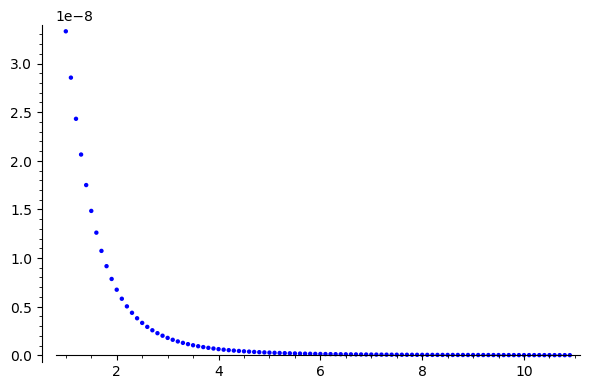

In [134]:
list_plot(plot_data_A_phi_dipol_z)

-3.00000000000000e-9
-4.00000000000000e-9


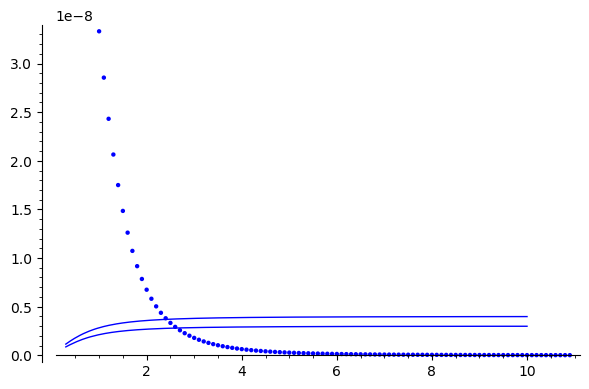

In [137]:
p = list_plot(plot_data_A_phi_dipol_z)
for ik in range(2):
    k = -0.000000001*(ik+3)
    print(k)
    p += plot(k*A_y0.subs(x == 1), z, 0.3, 10)
p.show()